<a href="https://colab.research.google.com/github/gunwes16/Data-110/blob/main/ChrisLeiby_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('trash_collection_Baltimore_2014-23.csv')

In [4]:
df_cleaned = df.drop(columns=['Unnamed: 14', 'Unnamed: 15'])

In [6]:
columns_to_convert = [
    "Weight (tons)", "Volume (cubic yards)", "Plastic Bottles", "Polystyrene",
    "Cigarette Butts", "Glass Bottles", "Plastic Bags", "Wrappers",
    "Sports Balls", "Homes Powered*"
    ]

In [13]:
for col in columns_to_convert:
    df_cleaned[col] = df_cleaned[col].astype(str).str.replace(',', '', regex=False)
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Convert 'Date' to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Drop rows with missing critical values
df_cleaned = df_cleaned.dropna(subset=['Year', 'Date'])

In [14]:
# Summary of dataset
print(df_cleaned.describe())

# Number of entries per year
print(df_cleaned['Year'].value_counts().sort_index())

# Group by Year and get average of key metrics
yearly_summary = df_cleaned.groupby('Year')[[
    'Weight (tons)', 'Volume (cubic yards)', 'Plastic Bottles',
    'Polystyrene', 'Cigarette Butts', 'Glass Bottles',
    'Plastic Bags', 'Wrappers', 'Sports Balls'
]].mean().round(2)

print(yearly_summary)

        Dumpster         Year                           Date  Weight (tons)  \
count  629.00000   629.000000                            629     629.000000   
mean   315.00000  2018.597774  2019-02-12 11:26:48.267090432       3.210715   
min      1.00000  2014.000000            2014-05-16 00:00:00       0.780000   
25%    158.00000  2016.000000            2016-10-09 00:00:00       2.720000   
50%    315.00000  2019.000000            2019-01-23 00:00:00       3.200000   
75%    472.00000  2021.000000            2021-06-11 00:00:00       3.730000   
max    629.00000  2023.000000            2023-12-23 00:00:00       5.620000   
std    181.72094     2.740135                            NaN       0.743146   

       Volume (cubic yards)  Plastic Bottles  Polystyrene  Cigarette Butts  \
count            629.000000       629.000000   629.000000       629.000000   
mean              15.244833      1981.168521  1462.656598     18656.756757   
min                7.000000        80.000000    20.000

In [15]:
# Total collection per year (Weight)
total_weight_year = df_cleaned.groupby('Year')['Weight (tons)'].sum()

# Year with maximum collection
max_year = total_weight_year.idxmax()
print(f"Year with highest total trash collection (tons): {max_year}")

Year with highest total trash collection (tons): 2018.0


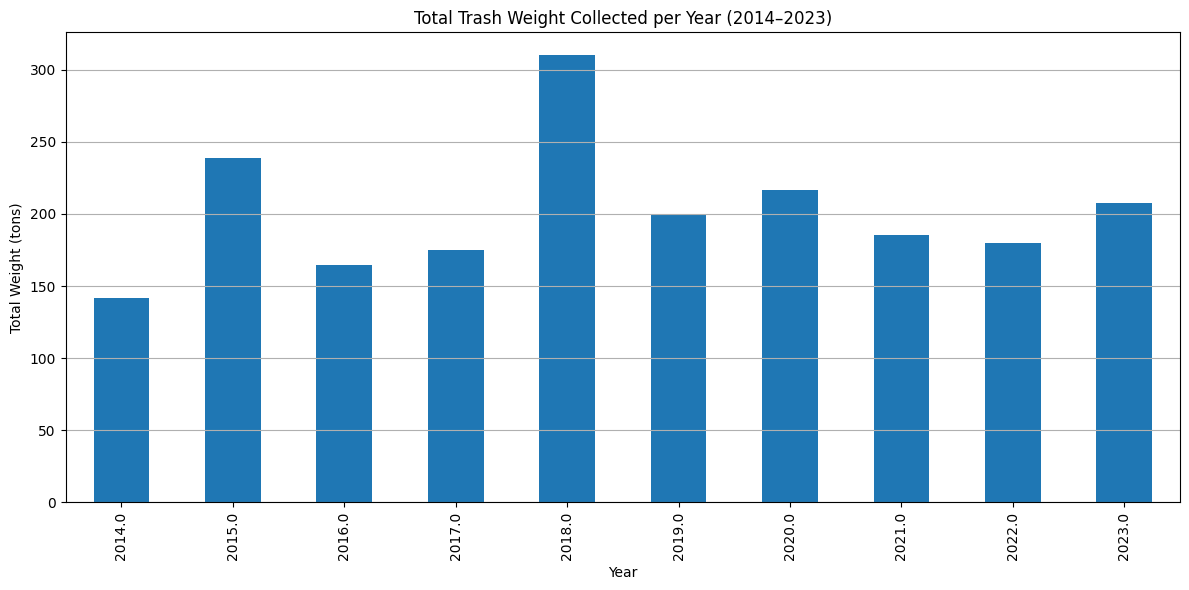

In [17]:
total_weight_per_year = df_cleaned.groupby('Year')["Weight (tons)"].sum()

plt.figure(figsize=(12, 6))
total_weight_per_year.plot(kind='bar')
plt.title("Total Trash Weight Collected per Year (2014–2023)")
plt.xlabel("Year")
plt.ylabel("Total Weight (tons)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-18-718f0fd0295a>:8: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


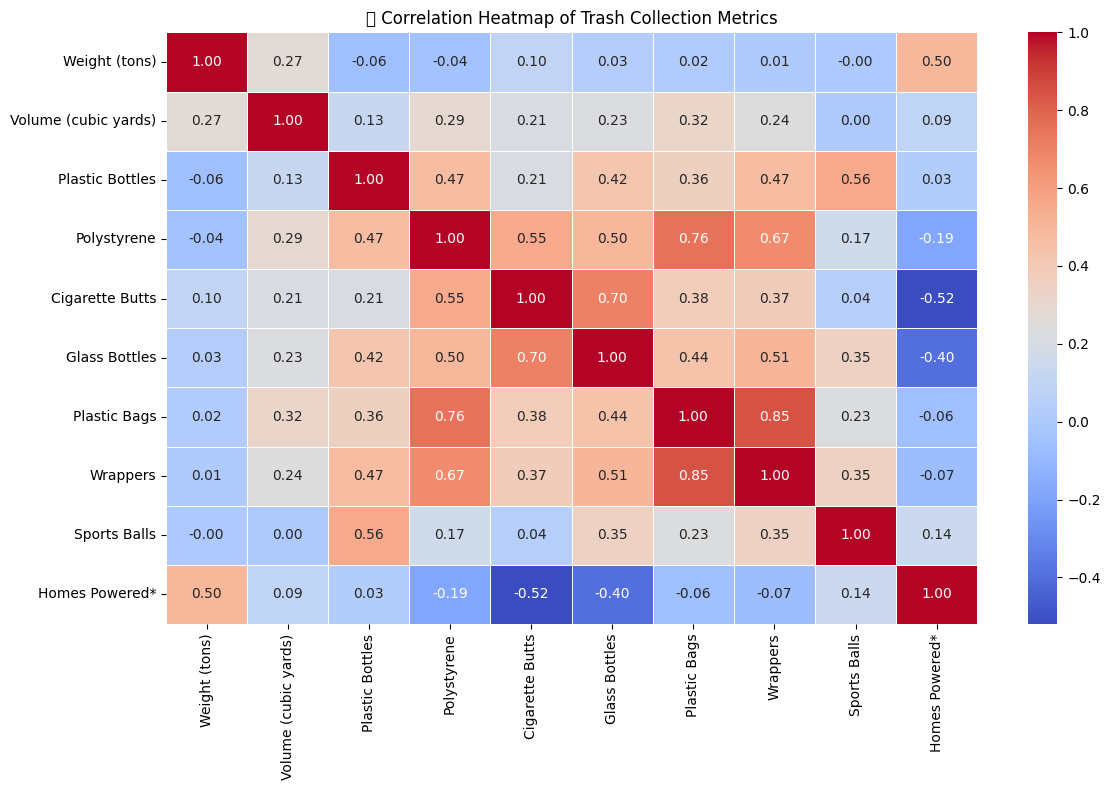

In [18]:
# Compute correlation matrix
correlation_matrix = df_cleaned[columns_to_convert].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("🔥 Correlation Heatmap of Trash Collection Metrics")
plt.tight_layout()
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Define features and target
X = df_cleaned[[
    "Volume (cubic yards)", "Plastic Bottles", "Polystyrene",
    "Cigarette Butts", "Glass Bottles", "Plastic Bags",
    "Wrappers", "Sports Balls", "Homes Powered*"
]]
y = df_cleaned["Weight (tons)"]

# Add constant for statsmodels
X_const = sm.add_constant(X)

# Fit OLS model using statsmodels
model = sm.OLS(y, X_const).fit()

# Get predictions and residuals
predictions = model.predict(X_const)
residuals = y - predictions

# Display summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Weight (tons)   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     70.19
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.22e-88
Time:                        04:04:46   Log-Likelihood:                -484.08
No. Observations:                 629   AIC:                             988.2
Df Residuals:                     619   BIC:                             1033.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6748      0.247      2.729      0.007       0.189       1.161
Volume (cubic yards)     0.0772      0.017      4.583      0.000       0.044       0.110
Plastic Bottles      -8.747e-05   2.82e-05     -3.102      0.002      -0.000   -3.21e-05
Polystyrene             -0.0001   3.12e-05     -3.873      0.000      -0.000   -5.96e-05
Cigarette Butts       1.398e-05   1.23e-06     11.371      0.000    1.16e-05    1.64e-05
Glass Bottles            0.0056      0.002      2.484      0.013       0.001       0.010
Plastic Bags         -5.203e-05    5.8e-05     -0.897      0.370      -0.000    6.19e-05
Wrappers              3.187e-05   4.96e-05      0.643      0.520   -6.54e-05       0.000
Sports Balls            -0.0056      0.003     -1.955      0.051      -0.011    2.59e-05
Homes Powered*           0.0294      0.001     22.077      0.000       0.027       0.032
==============================================================================
Omnibus:                      150.956   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              528.866
Skew:                           1.095   Prob(JB):                    1.44e-115
Kurtosis:                       6.922   Cond. No.                     4.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""